In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
file_path = 'Beichen_Form.csv'
data = pd.read_csv(file_path)

In [4]:
print("Data Overview:")
data.head()

Data Overview:


,Timestamp,imagine_future,today_compare_future_imagined,daydream_imagine,create_worlds_mind,stories_books_movies,tired_relax_way,movies_books_as_escape,afraid_growing_up
0,2024/10/17 1:56:44 pm CET,5,Completely different,4,"Yes, frequently",Mystery,Sleep,"Yes, definitely",No
1,2024/10/17 2:04:04 pm CET,4,Completely different,5,"Yes, frequently",Horror,Play games,"Yes, definitely",Yes
2,2024/10/17 2:04:26 pm CET,4,Somewhat similar,4,"Yes, sometimes",Science Fiction,Sleep,Sometimes,No
3,2024/10/17 2:06:04 pm CET,5,Somewhat similar,5,"Yes, frequently",Fantasy,Watch TV,"Yes, definitely",Yes
4,2024/10/17 2:06:28 pm CET,4,Somewhat similar,4,"Yes, sometimes",Science Fiction,Sleep,"Yes, definitely",Yes


In [6]:
display(data)

,Timestamp,imagine_future,today_compare_future_imagined,daydream_imagine,create_worlds_mind,stories_books_movies,tired_relax_way,movies_books_as_escape,afraid_growing_up
0,2024/10/17 1:56:44 pm CET,5,Completely different,4,"Yes, frequently",Mystery,Sleep,"Yes, definitely",No
1,2024/10/17 2:04:04 pm CET,4,Completely different,5,"Yes, frequently",Horror,Play games,"Yes, definitely",Yes
2,2024/10/17 2:04:26 pm CET,4,Somewhat similar,4,"Yes, sometimes",Science Fiction,Sleep,Sometimes,No
3,2024/10/17 2:06:04 pm CET,5,Somewhat similar,5,"Yes, frequently",Fantasy,Watch TV,"Yes, definitely",Yes
4,2024/10/17 2:06:28 pm CET,4,Somewhat similar,4,"Yes, sometimes",Science Fiction,Sleep,"Yes, definitely",Yes
5,2024/10/17 2:06:31 pm CET,5,Completely different,4,"Yes, sometimes",Romance,Watch TV,Sometimes,Yes
6,2024/10/17 2:06:59 pm CET,5,Completely different,5,"Yes, frequently",Historical,Sleep,"Yes, definitely",No
7,2024/10/17 2:07:55 pm CET,4,Somewhat similar,5,"Yes, sometimes",Slice of Life or Magical Realism,Go to the cinema alone,"Yes, definitely",Yes
8,2024/10/17 2:10:29 pm CET,2,Somewhat similar,5,"Yes, frequently",Fantasy,Sleep,Sometimes,Yes
9,2024/10/17 2:11:40 pm CET,3,Completely different,4,"Yes, sometimes",Fantasy,Watch TV,"Yes, definitely",Yes


In [10]:
categorical_columns = [
    'today_compare_future_imagined', 
    'daydream_imagine', 
    'create_worlds_mind', 
    'stories_books_movies', 
    'tired_relax_way', 
    'movies_books_as_escape', 
    'afraid_growing_up'
]

frequency_counts = {col: data[col].value_counts() for col in categorical_columns}

In [11]:
def plot_frequency_counts(counts, title):
    plt.figure(figsize=(10, 6))
    counts.plot(kind='bar', color='skyblue')
    plt.title(title)
    plt.xlabel(counts.name)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

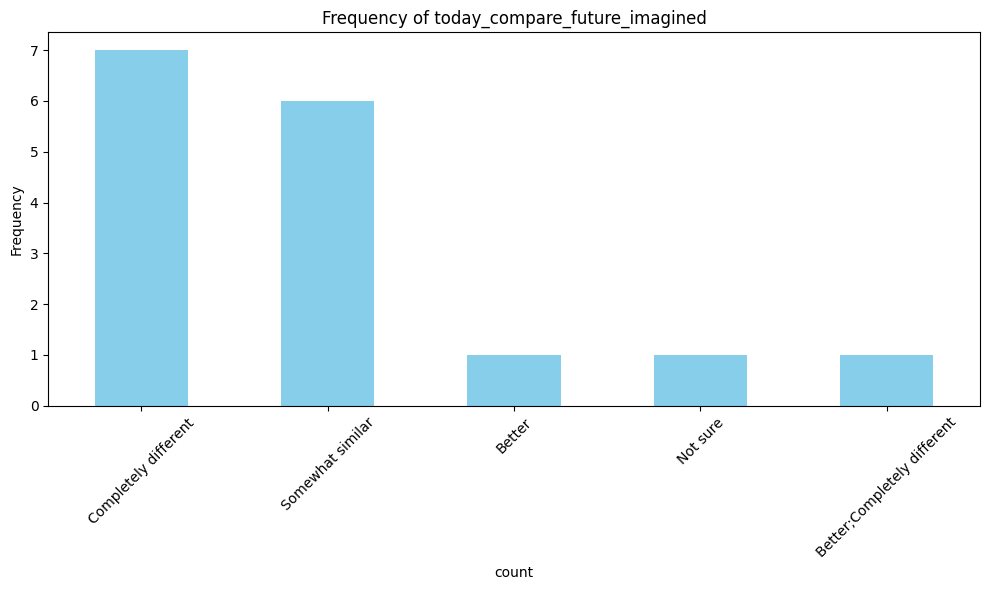

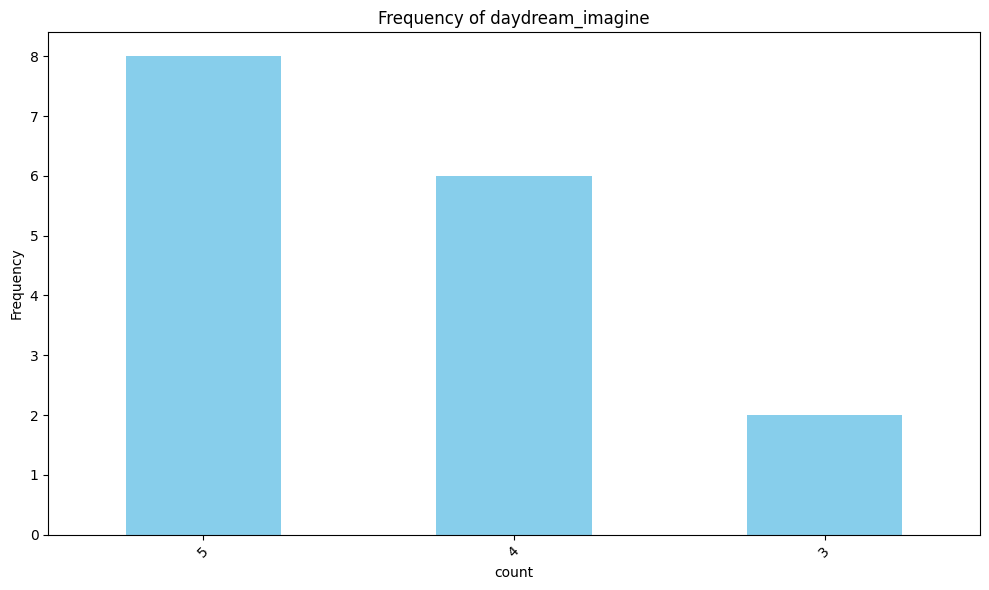

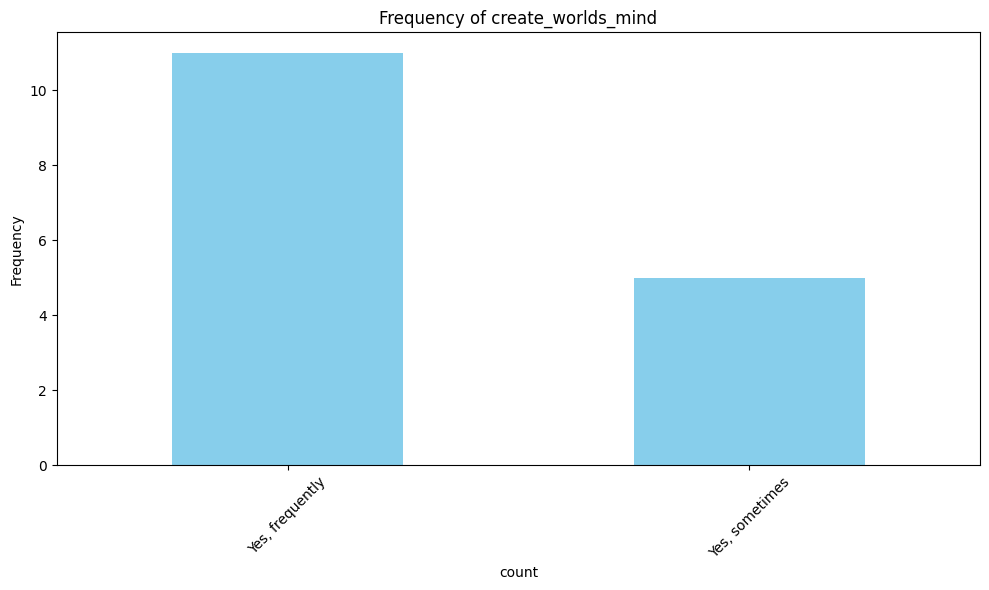

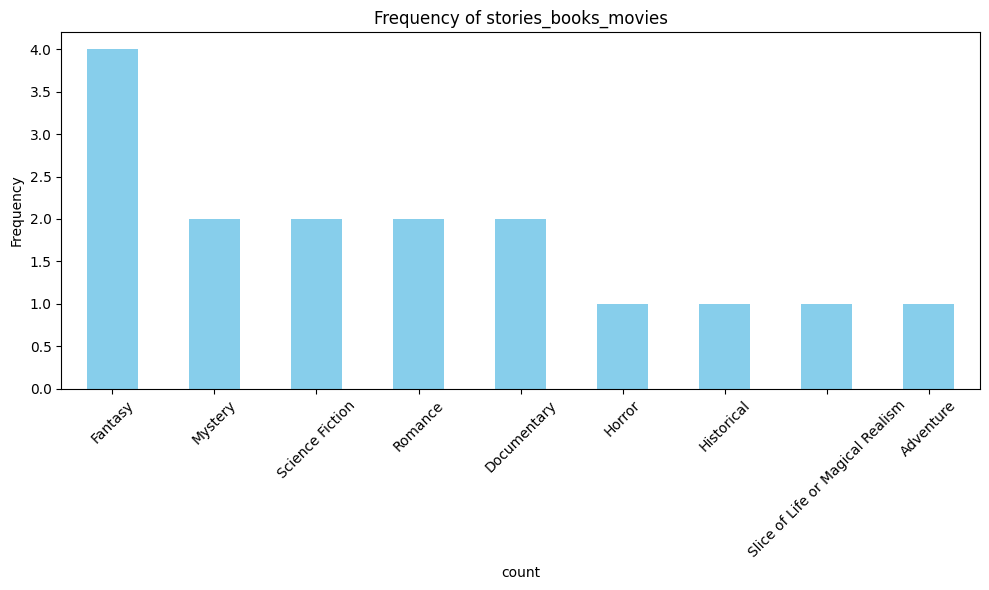

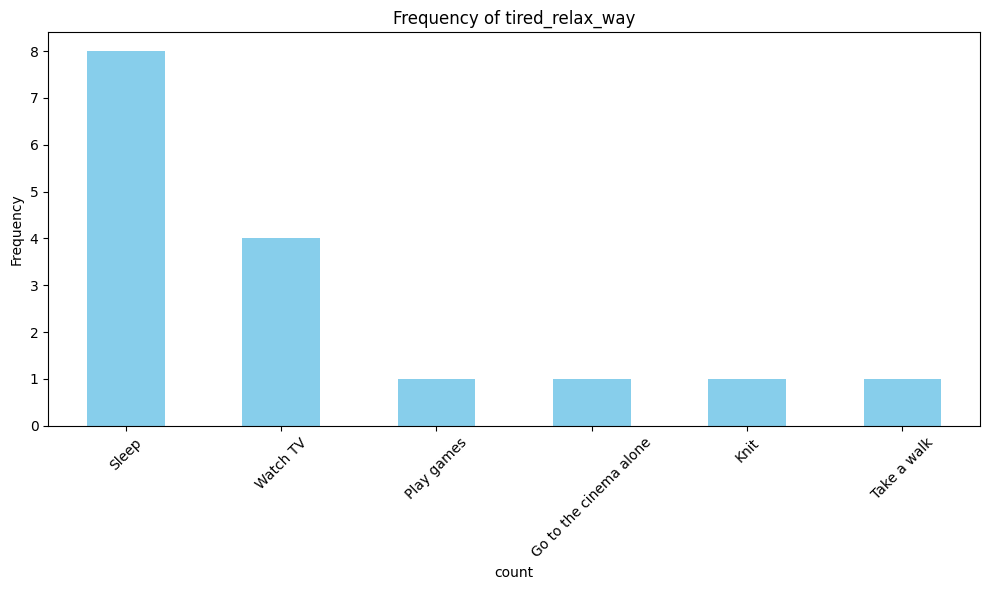

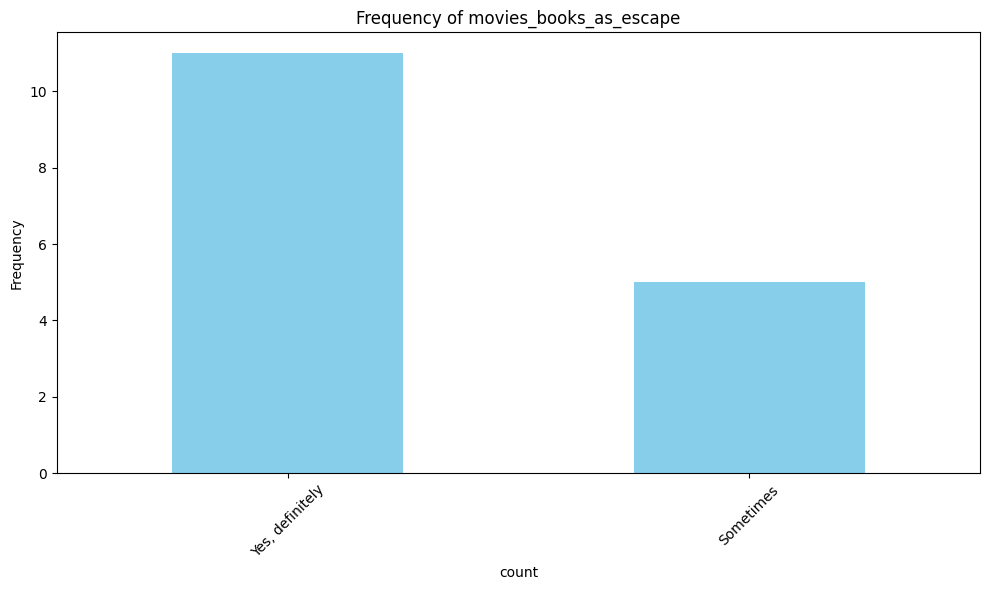

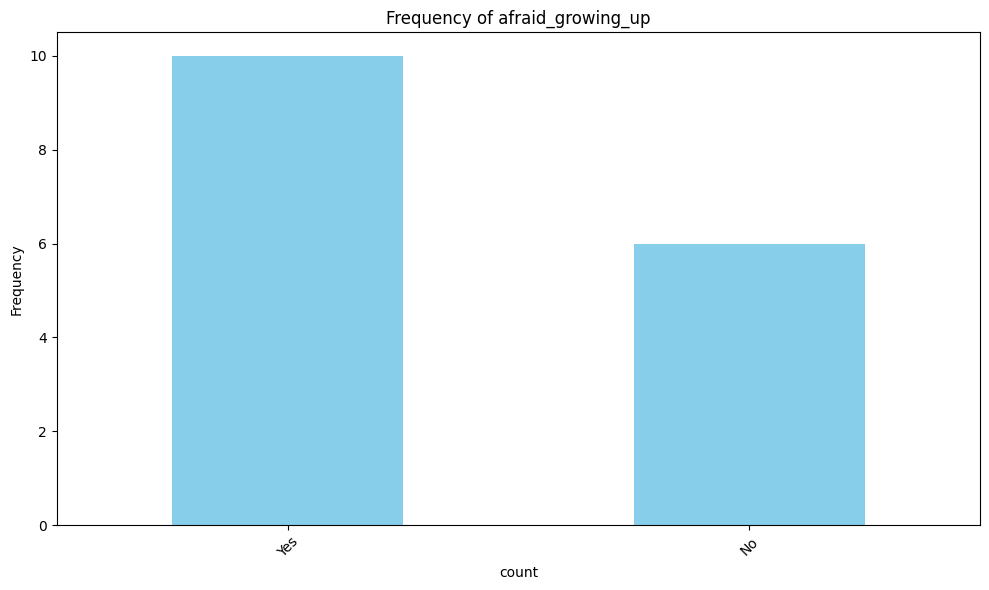

In [12]:
for col, counts in frequency_counts.items():
    plot_frequency_counts(counts, f'Frequency of {col}')


In [ ]:
# Today Compare Future Imagined: 
# A significant number of respondents feel their current situation is "Completely different" from their imagined future, indicating a disconnect that may lead to anxiety.
# Daydream Imagine: 
# Most respondents score high in daydreaming (scores of 4 and 5), suggesting that imaginative thinking is a common trait among us.
# Create Worlds in Mind: 
# A majority frequently engage in creating mental worlds, which may serve as a coping mechanism for managing their thoughts and emotions.
# Stories, Books, Movies: 
# A notable preference for Fantasy indicates that themes of escapism are prominent, reflecting a desire for imaginative exploration.
# Tired Relax Way: Sleep is the most common relaxation method, which may signify a need for rest amidst anxieties.
# Movies/Books as Escape: Many respondents use media as a form of escapism, indicating that literature and film play significant roles in their coping strategies.
# Afraid of Growing Up: A higher number of respondents express fear regarding growing up, which is crucial for understanding youth mental health.

In [7]:
cross_tabulations = {}
for i in range(len(categorical_columns)):
    for j in range(i + 1, len(categorical_columns)):
        col1 = categorical_columns[i]
        col2 = categorical_columns[j]
        cross_tab = pd.crosstab(data[col1], data[col2])
        cross_tabulations[(col1, col2)] = cross_tab

In [14]:
def plot_cross_tabulation(cross_tab, title, legend_title):
    cross_tab.plot(kind='bar', stacked=True,figsize=(10, 6))
    plt.title(title)
    plt.xlabel(cross_tab.index.name)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title=legend_title, labels=cross_tab.columns)
    plt.tight_layout()
    plt.show()

In [15]:
selected_cross_tabs = [
    (cross_tabulations[('today_compare_future_imagined', 'daydream_imagine')], 
     'Today Compare Future Imagined vs. Daydream Imagine', 
     'Daydream Levels'),
    
    (cross_tabulations[('today_compare_future_imagined', 'create_worlds_mind')], 
     'Today Compare Future Imagined vs. Create Worlds in Mind', 
     'Creation Frequency'),
    
    (cross_tabulations[('today_compare_future_imagined', 'stories_books_movies')], 
     'Today Compare Future Imagined vs. Stories, Books, Movies', 
     'Genres'),
    
    (cross_tabulations[('daydream_imagine', 'afraid_growing_up')], 
     'Daydream Imagine vs. Afraid of Growing Up', 
     'Fear of Growing Up'),
    
    (cross_tabulations[('create_worlds_mind', 'afraid_growing_up')], 
     'Create Worlds in Mind vs. Afraid of Growing Up', 
     'Fear of Growing Up'),
    
    (cross_tabulations[('tired_relax_way', 'afraid_growing_up')], 
     'Tired Relax Way vs. Afraid of Growing Up', 
     'Fear of Growing Up')
]

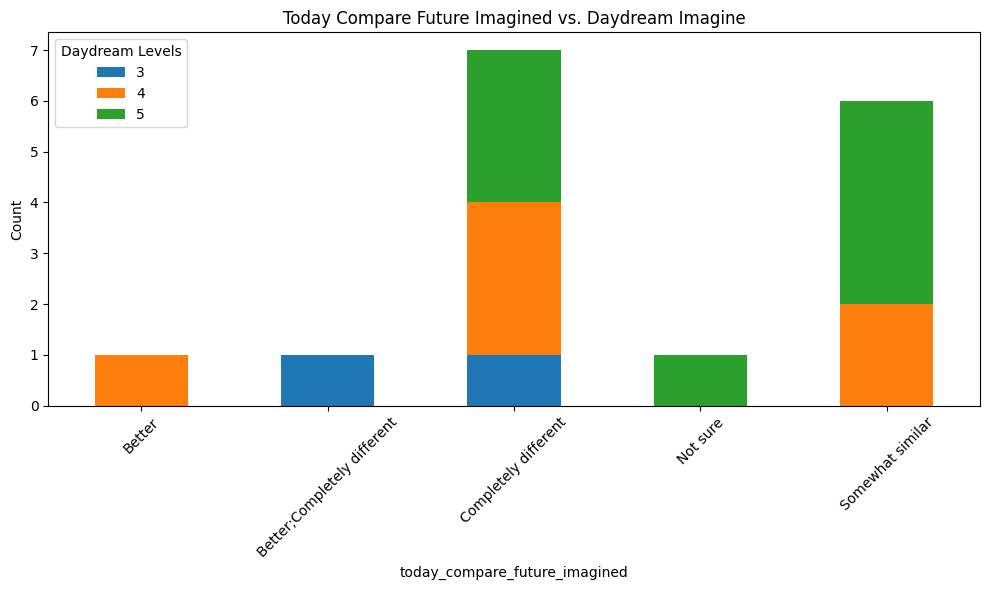

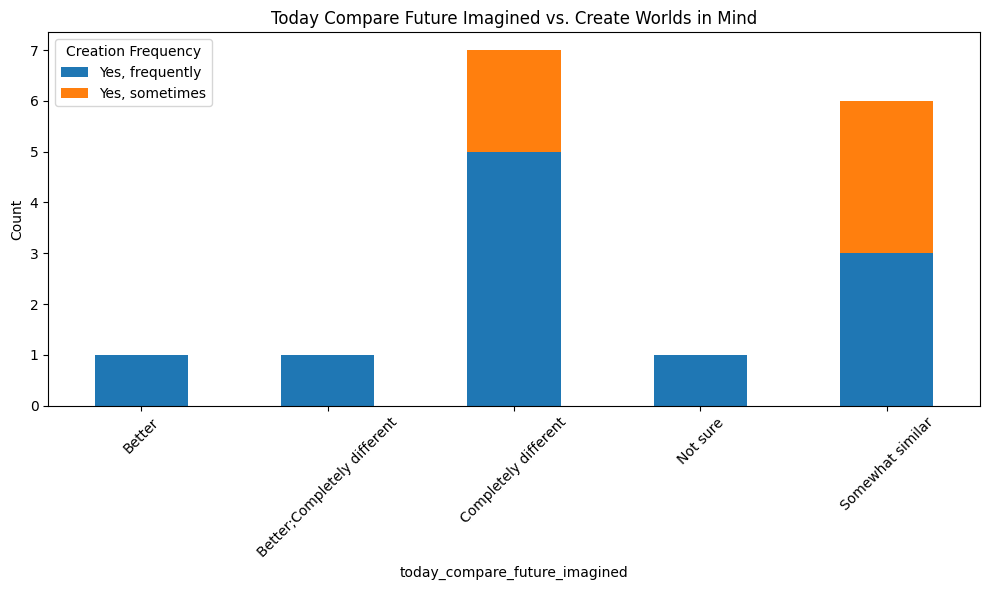

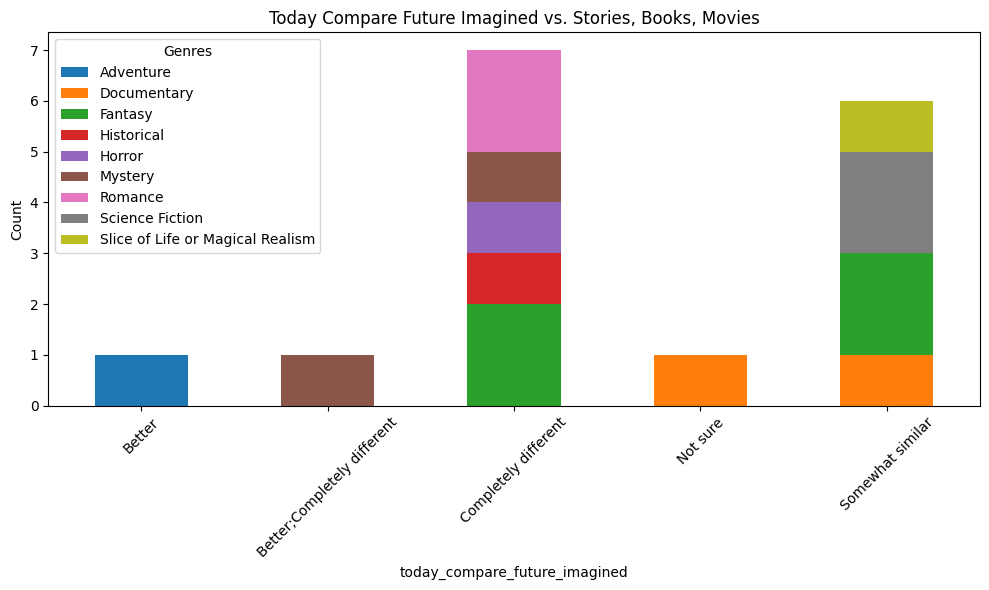

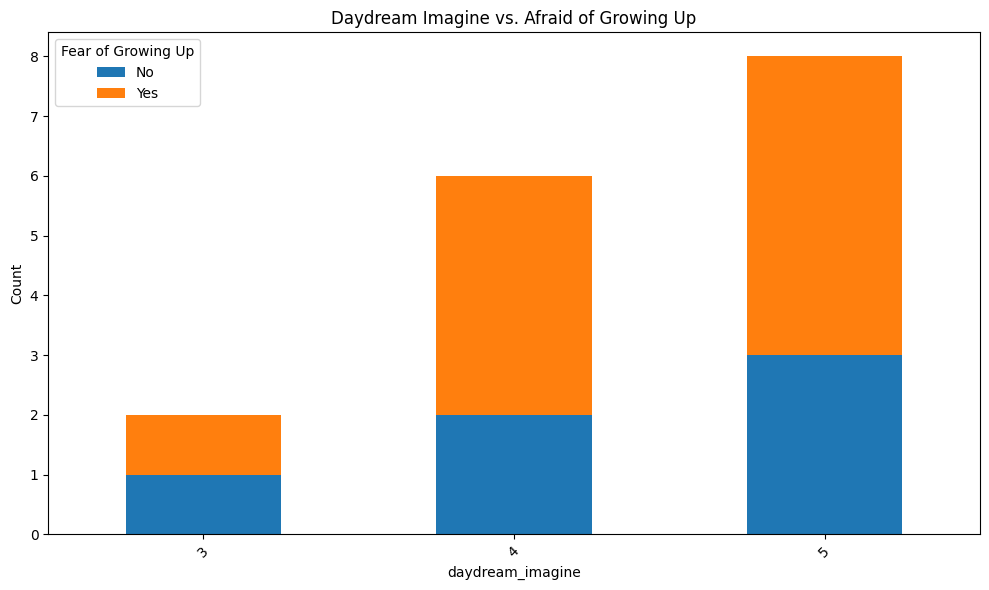

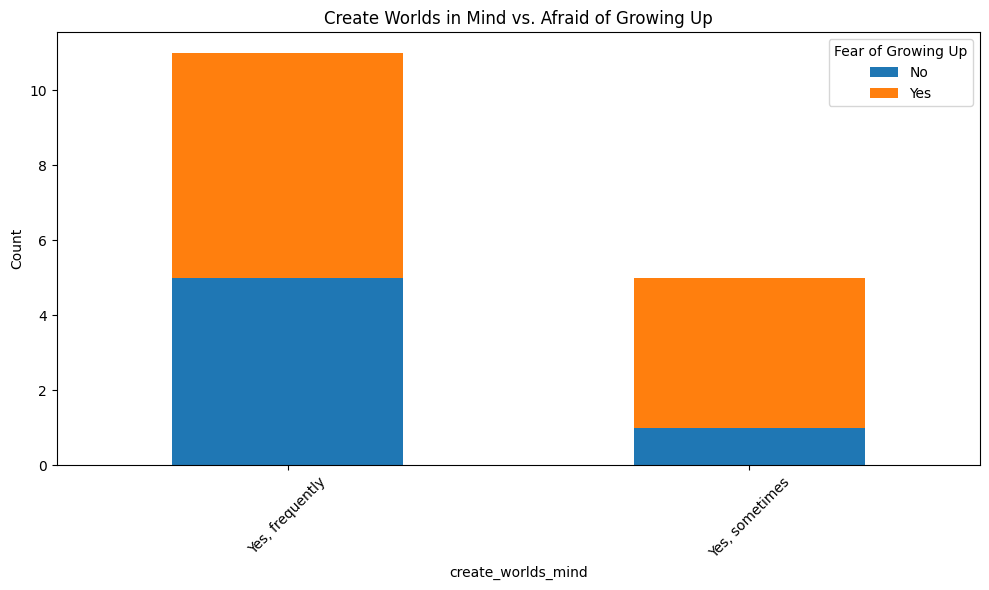

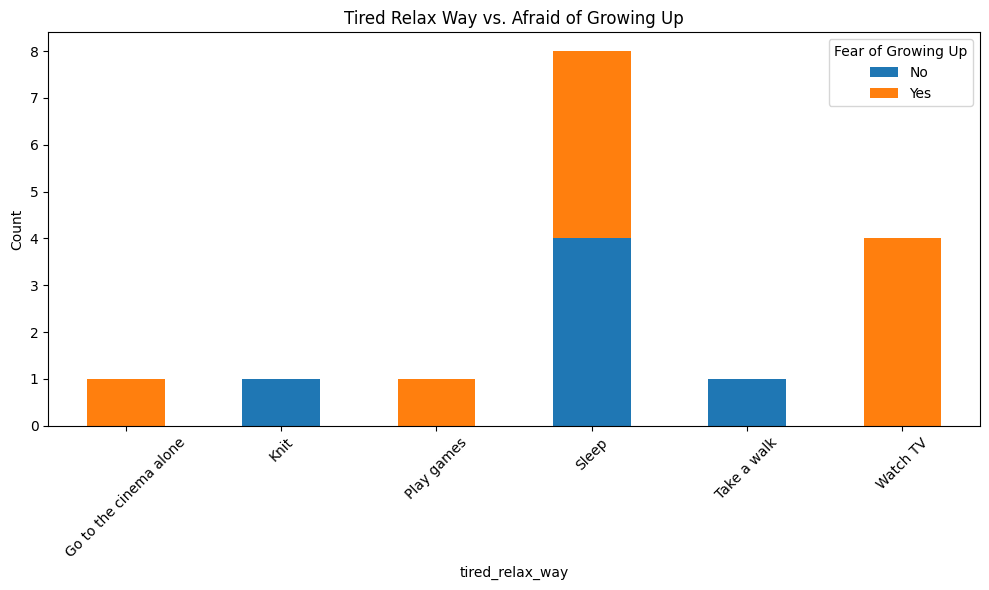

In [18]:
for cross_tab, title, legend_title in selected_cross_tabs:
    plot_cross_tabulation(cross_tab, title, legend_title)

In [ ]:
#Today Compare Future Imagined vs. Daydream Imagine:
# The relationship suggests that those who see their present as different from their future are likely to engage more in daydreaming.
# A higher daydream score is correlated with the perception of a "Completely different" future, indicating that imagination may be a response to anxiety about the future.

# Today Compare Future Imagined vs. Create Worlds in Mind:
# Indicates how the perception of the present influences the frequency of creating mental worlds.
# Respondents perceiving their current situation as "Completely different" are more likely to frequently create mental worlds, suggesting that imagination serves as a coping mechanism.

# Today Compare Future Imagined vs. Stories, Books, Movies
# The relationship between imagined futures and preferred genres reveals how narratives may influence self-perception and future outlook.
# Those who feel their present is "Completely different" are drawn to genres like Fantasy, indicating that such stories resonate with their experiences and aspirations.

# Daydream Imagine vs. Afraid of Growing Up
# Higher daydream scores correspond with increased fear of growing up, suggesting that imagination may amplify anxieties about the future.

# Create Worlds in Mind vs. Afraid of Growing Up
# What to find out the relationship underscores the potential role of creativity in processing fears about adulthood.
# Frequent creators of mental worlds tend to express more fear about growing up, implying that their imagination may reflect their anxieties.

# Tired Relax Way vs. Afraid of Growing Up
# Watching TV as a relaxation method aligns with a higher incidence of fear about growing up, suggesting that passive forms of relaxation may not mitigate anxiety.

In [20]:
additional_relationships = [
    ('daydream_imagine', 'stories_books_movies', 'Daydream Imagine vs. Stories, Books, Movies'),
    ('create_worlds_mind', 'movies_books_as_escape', 'Create Worlds in Mind vs. Movies/Books as Escape'),
    ('tired_relax_way', 'create_worlds_mind', 'Tired Relax Way vs. Create Worlds in Mind'),
    ('tired_relax_way', 'movies_books_as_escape', 'Tired Relax Way vs. Movies/Books as Escape')
]


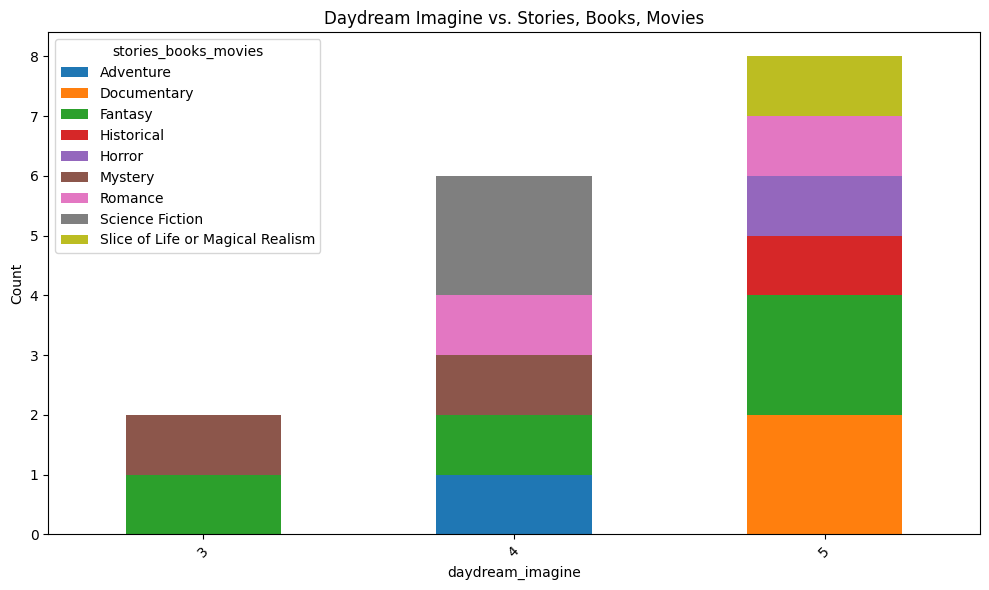

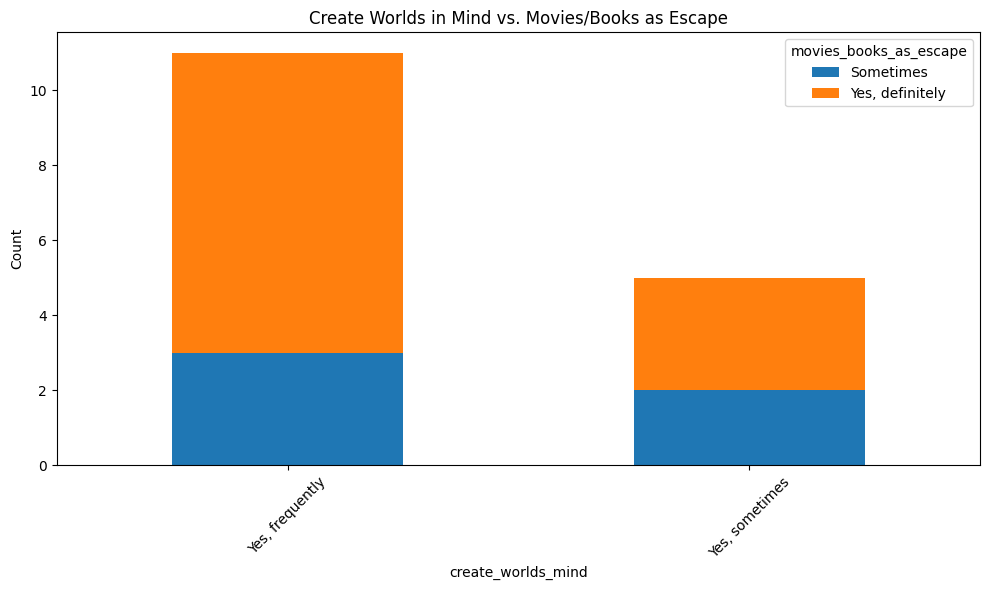

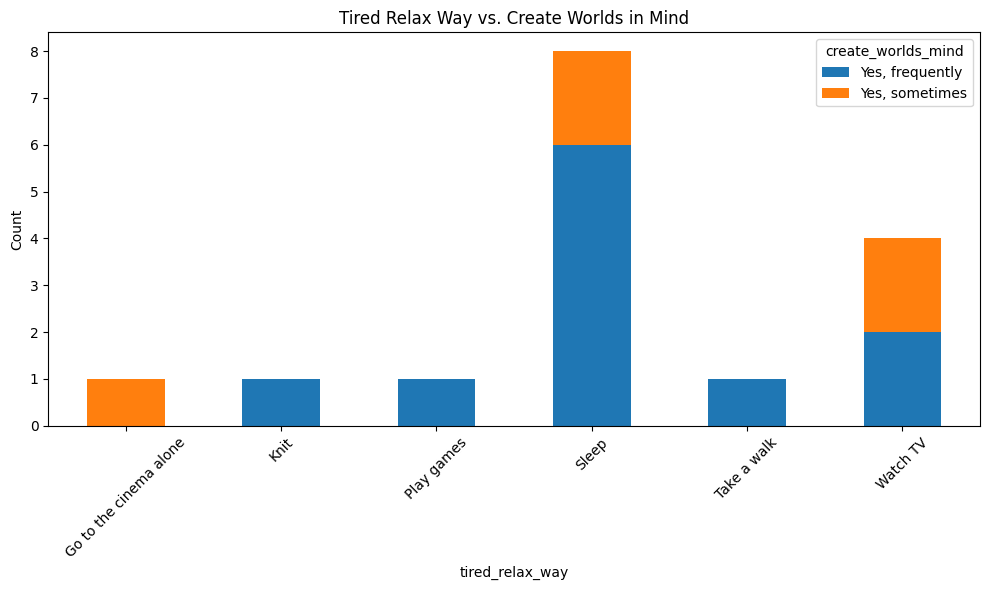

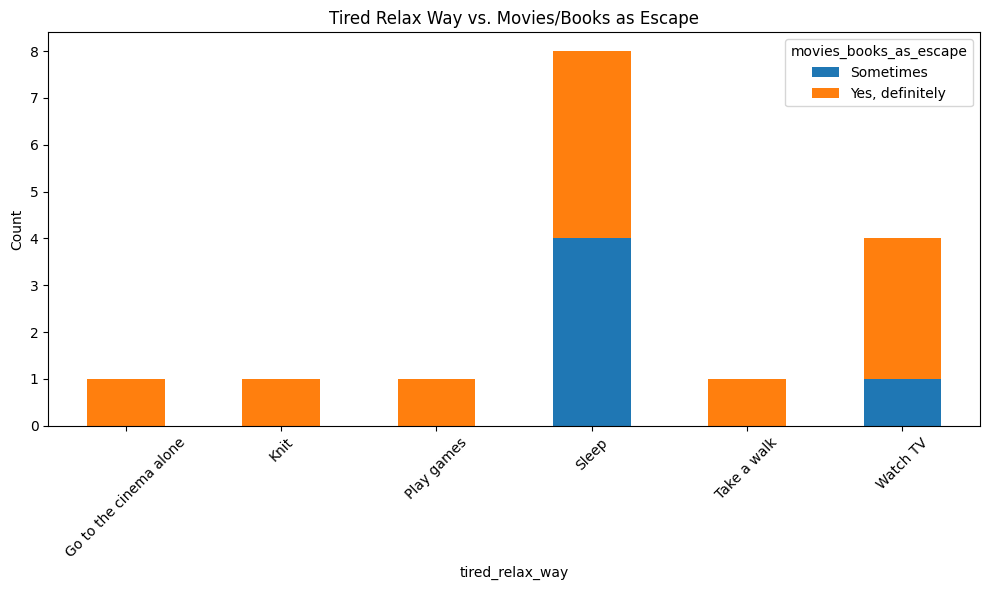

In [21]:
for col1, col2, title in additional_relationships:
    cross_tab = pd.crosstab(data[col1], data[col2])
    plot_cross_tabulation(cross_tab, title, col2)

In [ ]:
# Daydream Imagine vs. Stories, Books, Movies
# This relationship suggests that engagement with certain genres may be tied to imaginative tendencies.
# Respondents who daydream more frequently often engage with imaginative genres, reflecting how storytelling influences creativity.

# Create Worlds in Mind vs. Movies/Books as Escape
# Those who frequently create mental worlds are more likely to use movies and books for escapism, suggesting that both creativity and media 
# serve as coping strategies.

# Tired Relax Way vs. Create Worlds in Mind
# This relationship examines how relaxation methods correlate with creativity.
# Respondents who relax by sleeping also tend to create mental worlds frequently, indicating that rest may foster imaginative processes.

# Tired Relax Way vs. Movies/Books as Escape
# This plot explores how different relaxation methods are related to media consumption.
# Those who use TV as a relaxation method tend to view movies/books as a form of escapism more often, suggesting a link between relaxation 
# strategies and coping mechanisms.

In [ ]:
# The data analysis and visualizations reveal important insights into the interplay between imagination, media consumption, 
# and anxieties about growing up among respondents. The findings highlight the significance of creative expression and 
# storytelling as crucial elements in understanding youth mental health and coping strategies. 
# Understanding these relationships can guide future initiatives aimed at supporting young people's mental well-being.